In [20]:
import matplotlib.pyplot as plt
import math

# Constant

Energy to send a packet

In [26]:
EnergyTxRxSensor = 50 #nJ/bit
packet = 2000 #bit
k = 1 #nJ/bit/m²

EnergyToSendAPacket = packet*EnergyTxRxSensor
print(EnergyToSendAPacket, "nJ")

100000 nJ


Battery of the sensors

In [25]:
battery = 5 #mJ

# First point

Sensors positioning

In [17]:
sensors = [(1,2), (10,3), (4,8), (16,7), (6,1), (9,12), (14,4), (3, 10), (7,7), (12, 14)]
sink = (20,20)
x_coords = [sensor[0] for sensor in sensors]
y_coords = [sensor[1] for sensor in sensors]

Plot of the sensors

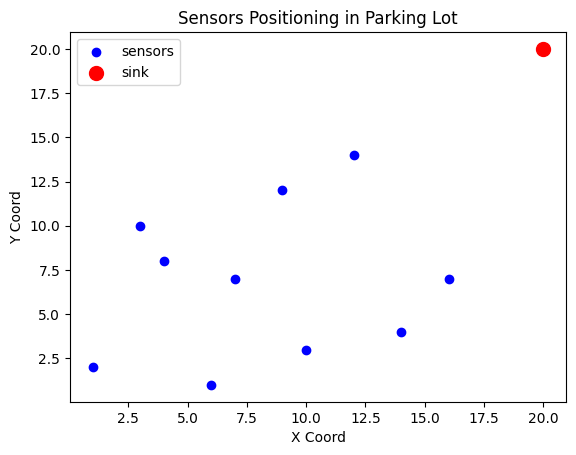

In [18]:
plt.scatter(x_coords, y_coords, color='b', label='sensors')

# Aggiungere il punto speciale (20,20) con un colore diverso
plt.scatter(20, 20, color='r', marker='o', s=100, label='sink')

# Aggiungere etichette e titolo
plt.xlabel('X Coord')
plt.ylabel('Y Coord')
plt.title('Sensors Positioning in Parking Lot')

# Aggiungere legenda
plt.legend()

# Mostrare il grafico
plt.show()

Computing the distance it's obtained

In [43]:
distances = [math.sqrt((x - sink[0])**2 + (y - sink[1])**2) for x, y in sensors]
max = -1
for i, dist in enumerate(distances):
    print(f"Distance from the the sennsor {sensors[i]} to the sink is: {dist:.2f} meters")
    if(dist > max):
        max = dist

Distance from the the sennsor (1, 2) to the sink is: 26.17 meters
Distance from the the sennsor (10, 3) to the sink is: 19.72 meters
Distance from the the sennsor (4, 8) to the sink is: 20.00 meters
Distance from the the sennsor (16, 7) to the sink is: 13.60 meters
Distance from the the sennsor (6, 1) to the sink is: 23.60 meters
Distance from the the sennsor (9, 12) to the sink is: 13.60 meters
Distance from the the sennsor (14, 4) to the sink is: 17.09 meters
Distance from the the sennsor (3, 10) to the sink is: 19.72 meters
Distance from the the sennsor (7, 7) to the sink is: 18.38 meters
Distance from the the sennsor (12, 14) to the sink is: 10.00 meters


Based on the distance, the farthest sensor from the sink will consume more energy, and for this reason will finish the battery earlier

In [33]:
EnergyForTrasmission= k*max**2 #nJ/bit
print(EnergyForTrasmission," nJ/bit")

685.0  nJ/bit


Total Energy

In [40]:
TotEnergy= EnergyToSendAPacket + EnergyForTrasmission
print(TotEnergy," nJ")

100685.0  nJ


The **cycles** needed to consume the battery are:  

In [41]:
cycles = battery * 1000000 / TotEnergy
print(cycles)

49.65983016338084


# Second point

To determine the optimal position of the sink while minimizing the total distance to all sensors, we propose placing the sink at the center of the dataset

In [35]:
meanX = sum(x_coords) / len(x_coords)
meanY = sum(y_coords) / len(y_coords)

optimal_sink = (meanX, meanY)
optimal_sink_x = optimal_sink[0]
optimal_sink_y = optimal_sink[1]

print(optimal_sink)

(8.2, 6.8)


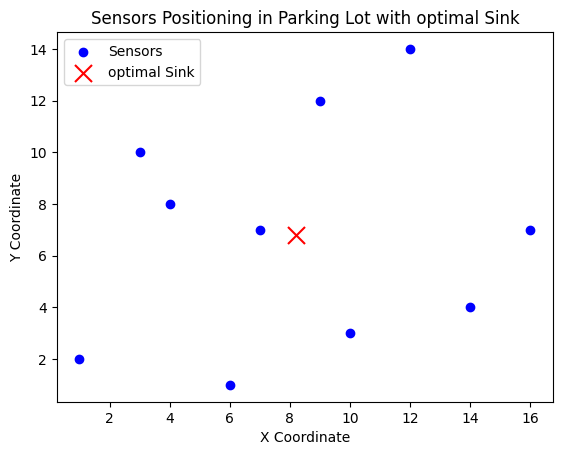

In [39]:
plt.scatter(x_coords, y_coords, color='b', label='Sensors')

plt.scatter(optimal_sink[0], optimal_sink[1], color='r', marker='x', s=150, label='optimal Sink')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Sensors Positioning in Parking Lot with optimal Sink')

plt.legend()
plt.show()

# Third point

Since we have identified the optimal sink position that minimizes energy consumption for the sensors, any other placement of the sink will be sub-optimal, leading to lower performance and increased energy consumption.

Consider the impact on system lifetime and energy consumption of each
sensor ????